In [7]:
install.packages("bootstrap")
install.packages("genridge")
install.packages("rpart.plot")
install.packages("corrplot")


The downloaded binary packages are in
	/var/folders/p2/3vyybrys3f5cgcrs2zkj3hdw0000gn/T//RtmpWE0IYV/downloaded_packages

The downloaded binary packages are in
	/var/folders/p2/3vyybrys3f5cgcrs2zkj3hdw0000gn/T//RtmpWE0IYV/downloaded_packages

The downloaded binary packages are in
	/var/folders/p2/3vyybrys3f5cgcrs2zkj3hdw0000gn/T//RtmpWE0IYV/downloaded_packages

The downloaded binary packages are in
	/var/folders/p2/3vyybrys3f5cgcrs2zkj3hdw0000gn/T//RtmpWE0IYV/downloaded_packages


In [8]:
library(ISLR2)
library(caret)
library(genridge)
library(rpart)
library(rpart.plot)
library(corrplot)
library(tidyverse)

Loading required package: ggplot2

Loading required package: lattice

Loading required package: car

Loading required package: carData


Attaching package: ‘genridge’


The following object is masked from ‘package:caret’:

    precision


corrplot 0.92 loaded

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
✔ purrr   0.3.4      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()
✖ dplyr::recode() masks car::recode()
✖ purrr::some()   masks car::some()


## Q - 1

#### For the prostate data of Chapter 3 (ESL), carry out a best-subset linear regression analysis, as in Table 3.3 (third column from the left).  Compute the AIC, BIC, five- and tenfold cross-validation, and bootstrap .632 estimates of prediction error.  The data can be obtained from the book website

In [54]:
pro_data <- prostate

#aving the prostate data into pro_data

In [55]:
head(pro_data)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<lgl>
1,-0.5798185,2.769459,50,-1.386294,0,-1.386294,6,0,-0.4307829,TRUE
2,-0.9942523,3.319626,58,-1.386294,0,-1.386294,6,0,-0.1625189,TRUE
3,-0.5108256,2.691243,74,-1.386294,0,-1.386294,7,20,-0.1625189,TRUE
4,-1.2039728,3.282789,58,-1.386294,0,-1.386294,6,0,-0.1625189,TRUE
5,0.7514161,3.432373,62,-1.386294,0,-1.386294,6,0,0.3715636,TRUE
6,-1.0498221,3.228826,50,-1.386294,0,-1.386294,6,0,0.7654678,TRUE


In [56]:
dim(pro_data)

[1] 97 10

In [57]:
summary(pro_data)

     lcavol           lweight           age             lbph        
 Min.   :-1.3471   Min.   :2.375   Min.   :41.00   Min.   :-1.3863  
 1st Qu.: 0.5128   1st Qu.:3.376   1st Qu.:60.00   1st Qu.:-1.3863  
 Median : 1.4469   Median :3.623   Median :65.00   Median : 0.3001  
 Mean   : 1.3500   Mean   :3.629   Mean   :63.87   Mean   : 0.1004  
 3rd Qu.: 2.1270   3rd Qu.:3.876   3rd Qu.:68.00   3rd Qu.: 1.5581  
 Max.   : 3.8210   Max.   :4.780   Max.   :79.00   Max.   : 2.3263  
      svi              lcp             gleason          pgg45       
 Min.   :0.0000   Min.   :-1.3863   Min.   :6.000   Min.   :  0.00  
 1st Qu.:0.0000   1st Qu.:-1.3863   1st Qu.:6.000   1st Qu.:  0.00  
 Median :0.0000   Median :-0.7985   Median :7.000   Median : 15.00  
 Mean   :0.2165   Mean   :-0.1794   Mean   :6.753   Mean   : 24.38  
 3rd Qu.:0.0000   3rd Qu.: 1.1787   3rd Qu.:7.000   3rd Qu.: 40.00  
 Max.   :1.0000   Max.   : 2.9042   Max.   :9.000   Max.   :100.00  
      lpsa           train        

In [58]:
str(pro_data)

'data.frame':	97 obs. of  10 variables:
 $ lcavol : num  -0.58 -0.994 -0.511 -1.204 0.751 ...
 $ lweight: num  2.77 3.32 2.69 3.28 3.43 ...
 $ age    : int  50 58 74 58 62 50 64 58 47 63 ...
 $ lbph   : num  -1.39 -1.39 -1.39 -1.39 -1.39 ...
 $ svi    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ lcp    : num  -1.39 -1.39 -1.39 -1.39 -1.39 ...
 $ gleason: int  6 6 7 6 6 6 6 6 6 6 ...
 $ pgg45  : int  0 0 20 0 0 0 0 0 0 0 ...
 $ lpsa   : num  -0.431 -0.163 -0.163 -0.163 0.372 ...
 $ train  : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...


In [59]:
colnames(pro_data)

[1] "lcavol"  "lweight" "age"     "lbph"    "svi"     "lcp"     "gleason"
 [8] "pgg45"   "lpsa"    "train"

In [60]:
#splitting


training <- subset(prostate, train == "TRUE")[ ,1:9]
testing <- subset(prostate, train == "FALSE")[ ,1:9]

head(training)
dim(training)
head(testing)
dim(testing)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
1,-0.5798185,2.769459,50,-1.386294,0,-1.386294,6,0,-0.4307829
2,-0.9942523,3.319626,58,-1.386294,0,-1.386294,6,0,-0.1625189
3,-0.5108256,2.691243,74,-1.386294,0,-1.386294,7,20,-0.1625189
4,-1.2039728,3.282789,58,-1.386294,0,-1.386294,6,0,-0.1625189
5,0.7514161,3.432373,62,-1.386294,0,-1.386294,6,0,0.3715636
6,-1.0498221,3.228826,50,-1.386294,0,-1.386294,6,0,0.7654678


[1] 67  9

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
7,0.7371641,3.473518,64,0.6151856,0,-1.3862944,6,0,0.7654678
9,-0.7765288,3.539509,47,-1.3862944,0,-1.3862944,6,0,1.0473190
10,0.2231436,3.244544,63,-1.3862944,0,-1.3862944,6,0,1.0473190
15,1.2059708,3.442019,57,-1.3862944,0,-0.4307829,7,5,1.3987169
22,2.0592388,3.501043,60,1.4747630,0,1.3480732,7,20,1.6582281
25,0.3852624,3.667400,69,1.5993876,0,-1.3862944,6,0,1.7316555


[1] 30  9

In [68]:
y_training <- training $ lpsa
y_testing <- testing $ lpsa

In [69]:
library(leaps)

In [84]:
#regsubset selection

regrifit_max <- regsubsets (lpsa ~., data = training, nbest = 1,
                            nvmax = 8, method = "exhaustive")

In [85]:
summary_regrifit <- summary(regrifit_max)

In [86]:
select = summary_regrifit$outmat

training_error_store <- c()
testing_error_store <- c()

aic_store <- c()
bic_store <- c()

In [87]:
for (m in 1 : 8) {
    temp <- which(select[m, ] == "*")
    
    red_training <- training[ , c(temp, 9)]
    red_testing <- testing[ , c(temp, 9)]
    
    red_fitting <- lm(lpsa ~ ., data = red_training)
    
    aic <- AIC(red_fitting)
    bic <- BIC(red_fitting)
    
    predic_taining <- predict(red_fitting, newdata = red_training)
    predic_testing <- predict(red_fitting, newdata = red_testing)
    
    training_error <- sum((predic_taining - y_training)^2) * (1/length(y_training))
    testing_error <- sum((predic_testing - y_testing)^2) * (1/length(y_testing))
    
    training_error_store <- c(training_error_store, training_error)
    testing_error_store <- c(testing_error_store, testing_error)
    
    aic_store <- c(aic_store, aic)
    bic_store <- c(bic_store, bic)
    
    
}

In [74]:
training_error_store
testing_error_store

[1] 0.6646057 0.5536096 0.5210112 0.4897760 0.4786485 0.4558176 0.4393627
[8] 0.4391998

[1] 0.4797387 0.4924823 0.4005308 0.4563321 0.4859242 0.5485933 0.5165135
[8] 0.5212740

In [75]:
aic_store
bic_store

[1] 168.7642 158.5210 156.4548 154.3127 154.7729 153.4984 153.0350 155.0101

[1] 175.3782 167.3397 167.4783 167.5408 170.2058 171.1359 172.8772 177.0570

## REMEMBER

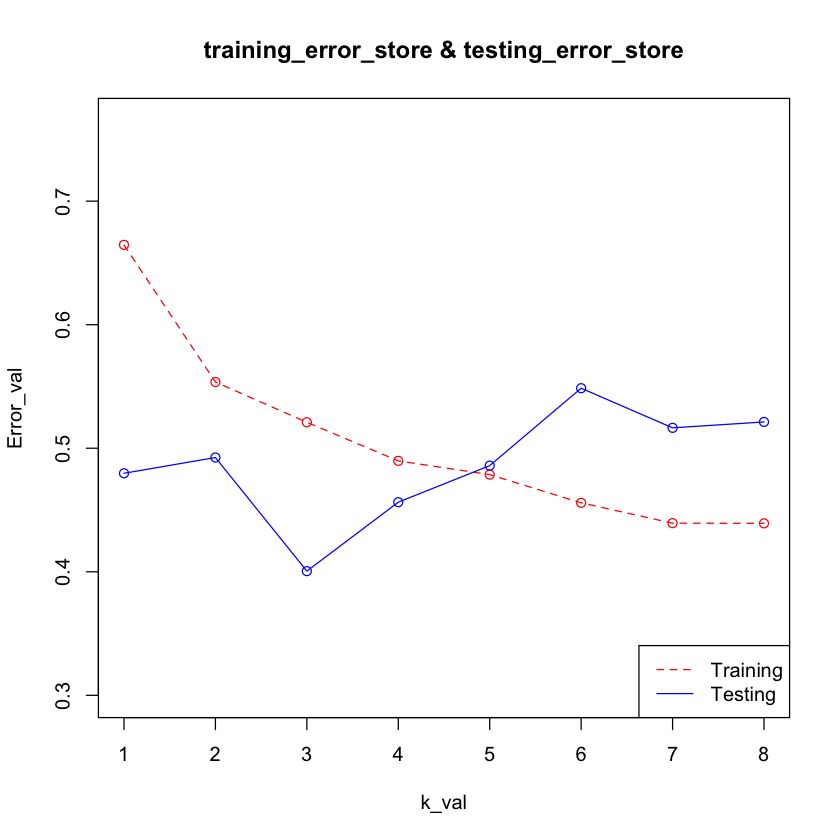

In [110]:
#plotting training and testing error

upper = max(training_error_store, testing_error_store)
lower = min(training_error_store, testing_error_store)

plot(training_error_store, type = "o", lty = 2, col = "red", 
     ylim = c(lower-0.1, upper+0.1), xlab = "k_val", 
     main = "training_error_store & testing_error_store", ylab = "Error_val")

lines(testing_error_store, type = "o", lty = 1, col = "blue")

legend("bottomright", c("Training", "Testing"), 
       lty = c(2,1), col = c("red","blue"))

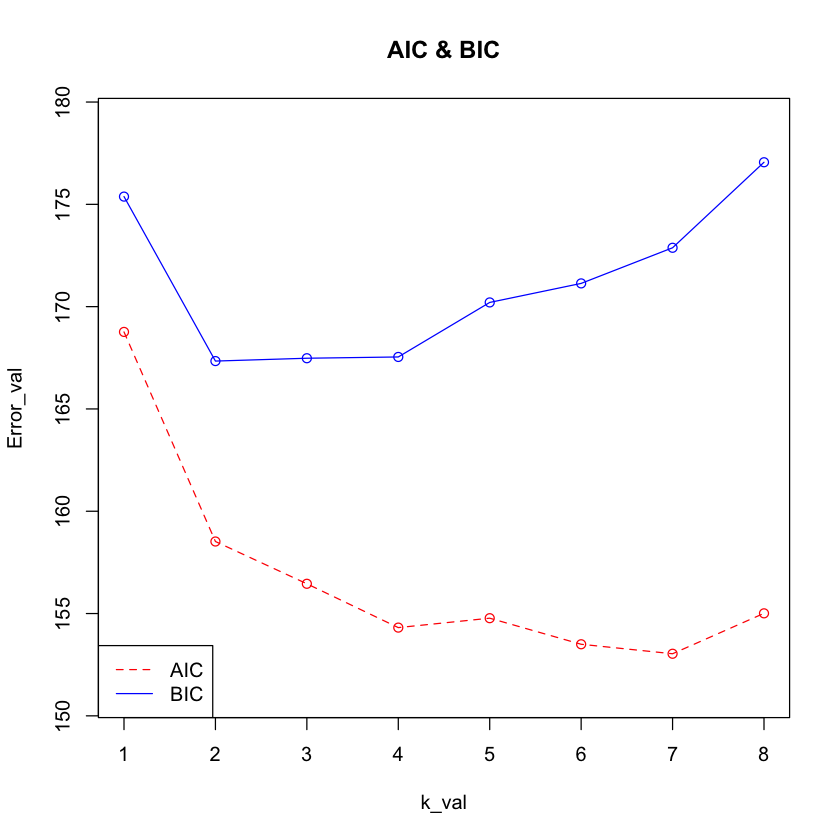

In [109]:
#plotting aic and bic 

upper = max(aic_store, bic_store)
lower = min(aic_store, bic_store)

plot(aic_store, type= "o", lty = 2, col = "red", 
     ylim = c(lower-2,upper+2), xlab = "k_val", main = "AIC & BIC", ylab="Error_val")

lines(bic_store, type = "o",lty = 1, col = "blue")

legend("bottomleft",c("AIC", "BIC"), 
       lty = c(2,1), col = c("red","blue"))


In [82]:
#k-fold cross validation

# k = 5 and 10

library(boot)


Attaching package: ‘boot’


The following object is masked from ‘package:car’:

    logit


The following object is masked from ‘package:lattice’:

    melanoma




In [90]:
set.seed(37)

c_error_k5_store <- c()
c_error_k10_store <- c()

In [91]:
for (n in 1 : 8) {
    temp <- which(select[n, ] == "*")
    
    genlm_data <- pro_data[ , c(temp, 9)]
    
    genlm_fit <- glm(lpsa~ ., data = genlm_data)
    
    c_error_k5 <- cv.glm(genlm_data, genlm_fit, K = 5) $ delta[2]
    c_error_k10 <- cv.glm(genlm_data, genlm_fit, K = 10) $ delta[2]
    
    c_error_k5_store <- c(c_error_k5_store, c_error_k5)
    c_error_k10_store <- c(c_error_k10_store, c_error_k10)
    
    
}

In [92]:
c_error_k5_store
which.min(c_error_k5_store)

[1] 0.6349129 0.5559676 0.5259335 0.4984627 0.5257873 0.5766910 0.5137905
[8] 0.5423138

[1] 4

In [93]:
c_error_k10_store
which.min(c_error_k10_store)

[1] 0.6431405 0.5715404 0.5244046 0.5472794 0.5531048 0.5403235 0.5413919
[8] 0.5162759

[1] 8

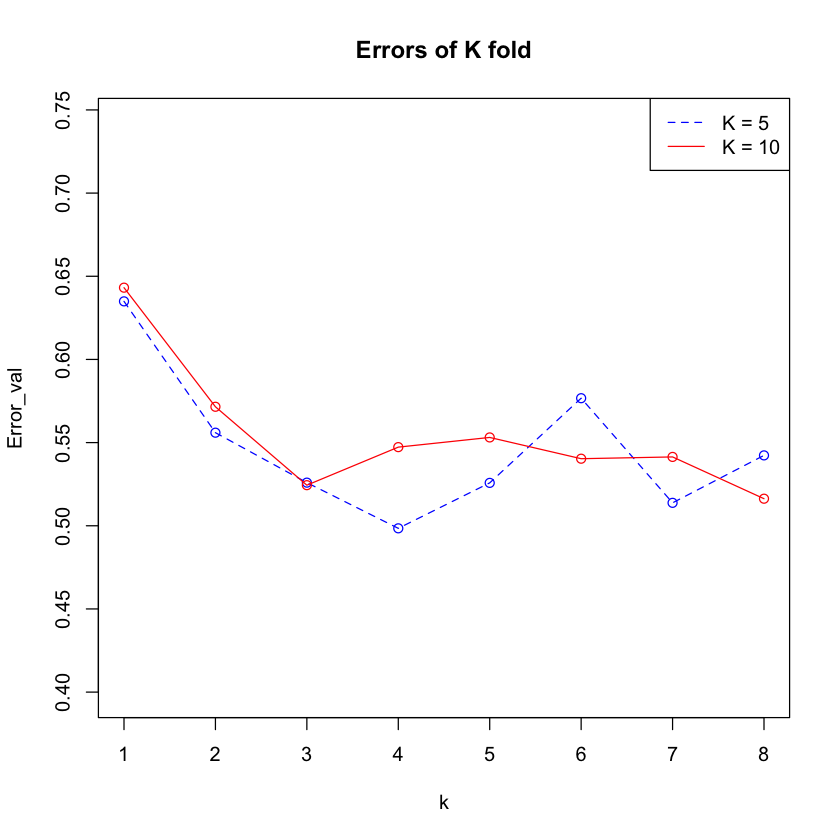

In [134]:
#plotting traing and test error

upper = max(c_error_k5_store, c_error_k10_store)
lower = min(c_error_k5_store, c_error_k10_store)

plot(c_error_k5_store, type = "o", lty = 2, col = "blue",
     ylim = c(lower-0.1, upper+0.1), xlab = "k", 
     ylab = "Error_val", main = "Errors of K fold")

lines(c_error_k10_store, type = "o", lty = 1, col = "red")
legend("topright", c("K = 5", "K = 10"), lty = c(2,1), col = c("blue", "red"))





In [112]:
# performing bootstrap .632
library(bootstrap)

In [114]:
#splitting data

x <- pro_data[ ,1:8]
y <- pro_data[ , 9]

In [115]:
#defining functions

theta.fit <- function(x,y){lsfit(x,y)}
theta.predict <- function(fit,x){cbind(1,x) %*% fit $ coef}
sq.error <- function(y,yhat){(y-yhat)^2}

In [204]:
#bootstrap

bootstrap.632.error.store <- c()

for (p in 1:8){
    temp <- which(select[p, ] == "*")
    res <- bootpred(x[ ,temp], y,nboot = 50,
            theta.fit, theta.predict, err.meas = sq.error)
    bootstrap.632.error.store <- c(bootstrap.632.error.store, res[[3]])
    
    
}

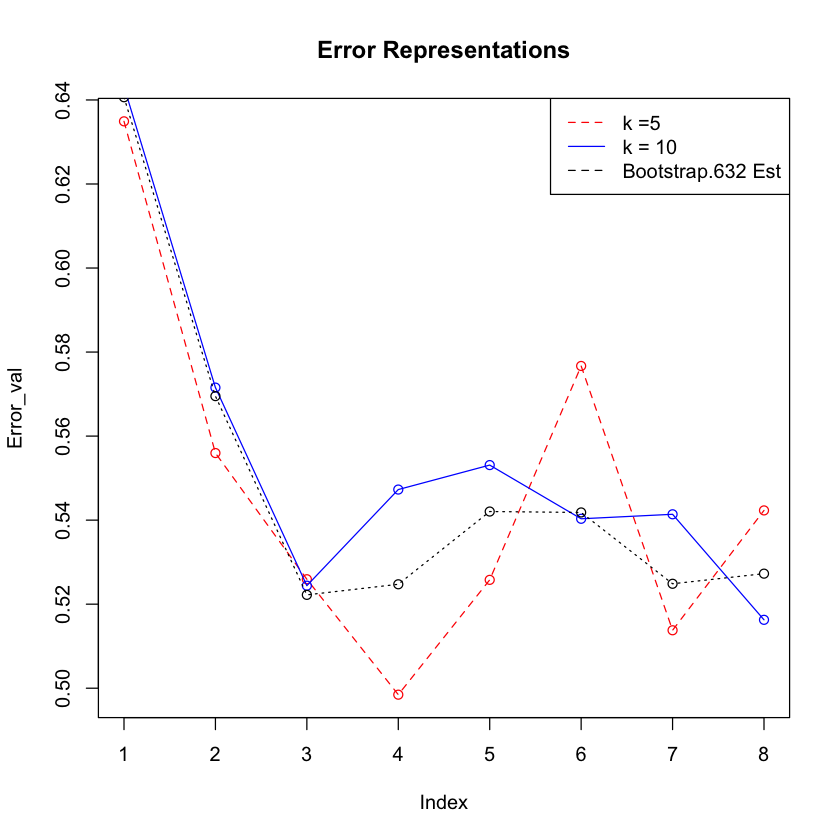

In [205]:
#plotting errors

plot(c_error_k5_store, type = "o", lty = 2, col = "red",
     ylab = "Error_val", main = "Error Representations")

lines(c_error_k10_store, type = "o", lty = 1, col = "blue")

lines(bootstrap.632.error.store, type = "o", lty = 3, col = "black")

legend("topright", c("k =5", "k = 10", "Bootstrap.632 Est"),
       lty = c(2,1), col = c("red", "blue", "black"))




## Q2 

#### The Bikeshare data (ISLR2) contains the hourly and daily count of rental bikes between 2011-2012 in a bikeshare program.  Other important features such as weather, and seasonal information, are also included.  You are asked to construct a regression tree to predict the daily count of rental bikes.

In [121]:
bike_data <- Bikeshare

head(bike_data)

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bikers
,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Jan,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0000,3,13,16
2,1,Jan,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0000,8,32,40
3,1,Jan,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0000,5,27,32
4,1,Jan,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0000,3,10,13
5,1,Jan,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0000,0,1,1
6,1,Jan,1,5,0,6,0,cloudy/misty,0.24,0.2576,0.75,0.0896,0,1,1


In [122]:
dim(bike_data)
summary(bike_data)

[1] 8645   15

     season           mnth           day              hr      
 Min.   :1.000   May    : 744   Min.   :  1.0   16     : 365  
 1st Qu.:2.000   July   : 744   1st Qu.: 94.0   17     : 365  
 Median :3.000   Oct    : 743   Median :185.0   12     : 364  
 Mean   :2.514   Dec    : 741   Mean   :184.4   13     : 364  
 3rd Qu.:3.000   Aug    : 731   3rd Qu.:275.0   14     : 364  
 Max.   :4.000   March  : 730   Max.   :365.0   15     : 364  
                 (Other):4212                   (Other):6459  
    holiday           weekday        workingday               weathersit  
 Min.   :0.00000   Min.   :0.000   Min.   :0.0000   clear          :5645  
 1st Qu.:0.00000   1st Qu.:1.000   1st Qu.:0.0000   cloudy/misty   :2218  
 Median :0.00000   Median :3.000   Median :1.0000   light rain/snow: 781  
 Mean   :0.02765   Mean   :3.013   Mean   :0.6837   heavy rain/snow:   1  
 3rd Qu.:0.00000   3rd Qu.:5.000   3rd Qu.:1.0000                         
 Max.   :1.00000   Max.   :6.000   Max.   :1.0

In [123]:
colnames(bike_data)

[1] "season"     "mnth"       "day"        "hr"         "holiday"   
 [6] "weekday"    "workingday" "weathersit" "temp"       "atemp"     
[11] "hum"        "windspeed"  "casual"     "registered" "bikers"

In [124]:
str(bike_data)

'data.frame':	8645 obs. of  15 variables:
 $ season    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ mnth      : Factor w/ 12 levels "Jan","Feb","March",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ day       : num  1 1 1 1 1 1 1 1 1 1 ...
 $ hr        : Factor w/ 24 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ holiday   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : num  6 6 6 6 6 6 6 6 6 6 ...
 $ workingday: num  0 0 0 0 0 0 0 0 0 0 ...
 $ weathersit: Factor w/ 4 levels "clear","cloudy/misty",..: 1 1 1 1 1 2 1 1 1 1 ...
 $ temp      : num  0.24 0.22 0.22 0.24 0.24 0.24 0.22 0.2 0.24 0.32 ...
 $ atemp     : num  0.288 0.273 0.273 0.288 0.288 ...
 $ hum       : num  0.81 0.8 0.8 0.75 0.75 0.75 0.8 0.86 0.75 0.76 ...
 $ windspeed : num  0 0 0 0 0 0.0896 0 0 0 0 ...
 $ casual    : num  3 8 5 3 0 0 2 1 1 8 ...
 $ registered: num  13 32 27 10 1 1 0 2 7 6 ...
 $ bikers    : num  16 40 32 13 1 1 2 3 8 14 ...


In [125]:
core <- cor(bike_data[, c(9, 10, 11, 12, 13, 14, 15)])
core

,temp,atemp,hum,windspeed,casual,registered,bikers
temp,1.000000000,0.99202154,-0.03952480,-0.005989444,0.47893076,0.3816144,0.45123254
atemp,0.992021540,1.00000000,-0.02354086,-0.046119638,0.47385896,0.3782754,0.44702854
hum,-0.039524797,-0.02354086,1.00000000,-0.263196230,-0.30709551,-0.2438153,-0.28861522
windspeed,-0.005989444,-0.04611964,-0.26319623,1.000000000,0.06611284,0.0808737,0.08535557
casual,0.478930757,0.47385896,-0.30709551,0.066112837,1.00000000,0.5188158,0.71474164
registered,0.381614376,0.37827535,-0.24381526,0.080873700,0.51881584,1.0000000,0.96871681
bikers,0.451232536,0.44702854,-0.28861522,0.085355569,0.71474164,0.9687168,1.00000000


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



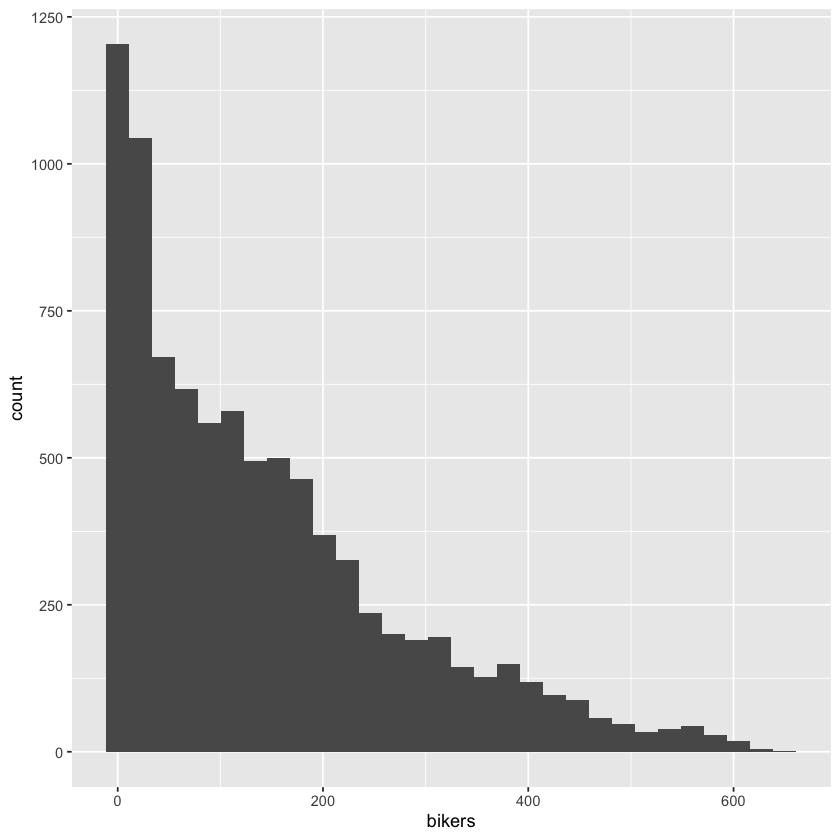

In [126]:
ggplot(bike_data, aes(x= bikers)) +
geom_histogram()

1. There are no nulls in the data.
2. Decision trees, on the other hand, deal with the issue of high collinearity.
3. The columns Temp and Atemp are also highly correlated.
4. It is clear that the bikers are a mix of casual and registered riders.


## Q - 2(a)

#### Divide the data into test and training and perform model selection to determine the optimal tree size. Comment on the performance of the tree.  How many test samples are assigned to each terminal region?

In [128]:
#dropping columns

new_bike_data <- bike_data[ ,-c(3, 13, 14)]

In [129]:
dim(new_bike_data)
head(new_bike_data)

[1] 8645   12

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,bikers
,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Jan,0,0,6,0,clear,0.24,0.2879,0.81,0.0000,16
2,1,Jan,1,0,6,0,clear,0.22,0.2727,0.80,0.0000,40
3,1,Jan,2,0,6,0,clear,0.22,0.2727,0.80,0.0000,32
4,1,Jan,3,0,6,0,clear,0.24,0.2879,0.75,0.0000,13
5,1,Jan,4,0,6,0,clear,0.24,0.2879,0.75,0.0000,1
6,1,Jan,5,0,6,0,cloudy/misty,0.24,0.2576,0.75,0.0896,1


In [130]:
#categorical values to factors

new_bike_data$season <- as.factor(new_bike_data$season)

new_bike_data$holiday <- as.factor(new_bike_data$holiday)

new_bike_data$weekday <- as.factor(new_bike_data$weekday)

new_bike_data$workingday <- as.factor(new_bike_data$workingday)

In [131]:
str(new_bike_data)

'data.frame':	8645 obs. of  12 variables:
 $ season    : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 1 1 1 ...
 $ mnth      : Factor w/ 12 levels "Jan","Feb","March",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ hr        : Factor w/ 24 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ holiday   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ weekday   : Factor w/ 7 levels "0","1","2","3",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ workingday: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ weathersit: Factor w/ 4 levels "clear","cloudy/misty",..: 1 1 1 1 1 2 1 1 1 1 ...
 $ temp      : num  0.24 0.22 0.22 0.24 0.24 0.24 0.22 0.2 0.24 0.32 ...
 $ atemp     : num  0.288 0.273 0.273 0.288 0.288 ...
 $ hum       : num  0.81 0.8 0.8 0.75 0.75 0.75 0.8 0.86 0.75 0.76 ...
 $ windspeed : num  0 0 0 0 0 0.0896 0 0 0 0 ...
 $ bikers    : num  16 40 32 13 1 1 2 3 8 14 ...


In [132]:
#one-hot encoding

copy <- dummyVars("~ .", data = new_bike_data)
bike_data_df <- data.frame(predict(copy, newdata = new_bike_data))

head(bike_data_df)

,season.1,season.2,season.3,season.4,mnth.Jan,mnth.Feb,mnth.March,mnth.April,mnth.May,mnth.June,⋯,workingday.1,weathersit.clear,weathersit.cloudy.misty,weathersit.light.rain.snow,weathersit.heavy.rain.snow,temp,atemp,hum,windspeed,bikers
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,0,1,0,0,0,0,0,⋯,0,1,0,0,0,0.24,0.2879,0.81,0.0000,16
2,1,0,0,0,1,0,0,0,0,0,⋯,0,1,0,0,0,0.22,0.2727,0.80,0.0000,40
3,1,0,0,0,1,0,0,0,0,0,⋯,0,1,0,0,0,0.22,0.2727,0.80,0.0000,32
4,1,0,0,0,1,0,0,0,0,0,⋯,0,1,0,0,0,0.24,0.2879,0.75,0.0000,13
5,1,0,0,0,1,0,0,0,0,0,⋯,0,1,0,0,0,0.24,0.2879,0.75,0.0000,1
6,1,0,0,0,1,0,0,0,0,0,⋯,0,0,1,0,0,0.24,0.2576,0.75,0.0896,1


In [155]:
#splitting train and test

set.seed(37)
train_flow <- sample(nrow(bike_data_df), .8*nrow(bike_data_df),  replace = FALSE)

training <- bike_data_df[train_flow, ]
dim(training)


testing <- bike_data_df[-train_flow, ]
dim(testing)

[1] 6916   60

[1] 1729   60

In [135]:
#model-control

model.control <- rpart.control(minbucket = 2, cp = 0.01,
                maxcompete = 3, maxsurrogate = 4, usesurrogate = 2, xval = 10,
              surrogatestyle = 0, maxdepth = 30)

In [136]:
#regression tree

fit_bike_data <- rpart(bikers ~., control = model.control, data = training)

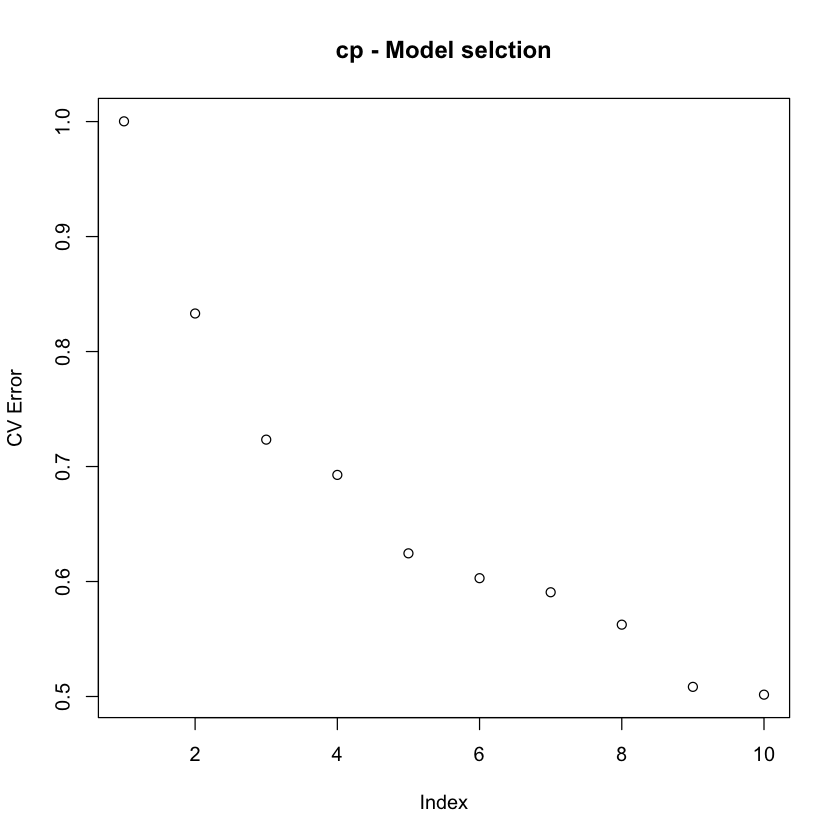

In [137]:
#plotting error

plot(fit_bike_data $ cptable[,4], ylab = "CV Error", 
     xlab = "Index", main = "cp - Model selction")

In [138]:
#pruned model based on min cp

cp_low <- which.min(fit_bike_data $ cptable[,4])
pruned_bike_data <- prune(fit_bike_data, cp = fit_bike_data $ cp[cp_low, 1])



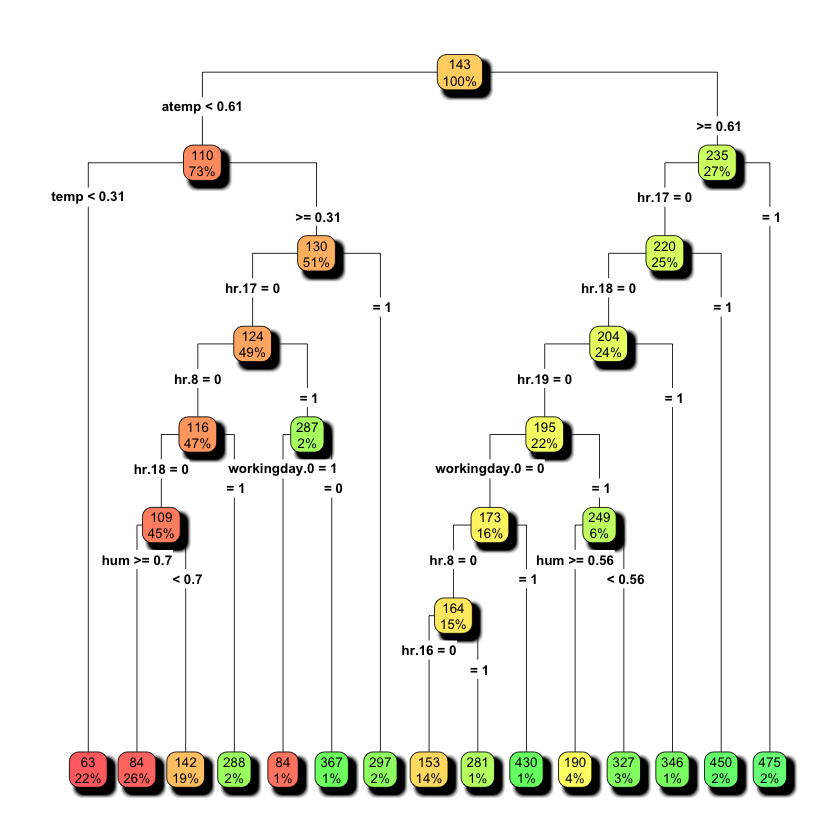

In [139]:
# plotting tree

rpart.plot(pruned_bike_data, box.palette = "RdYlGn", type = 4, shadow.col = "black")

In [172]:
#Train and test predictions

predic_training <- predict(pruned_bike_data, newdata = training)
predic_testing <- predict(pruned_bike_data, newdata = testing)

In [174]:
# Train and test errors

error_training <- (sum(predic_training - training $ bikers)^2) / length(training $ bikers)
error_testing <- (sum(predic_testing - testing $ bikers)^2) / length(testing$bikers)

error_training
round(error_testing, 2)
                                                                         

[1] 1.215194e-27

[1] 17153.16

In [175]:
# frame from pruned tree
pruned_bike_data_f <- pruned_bike_data$frame
head(pruned_bike_data_f)

,var,n,wt,dev,yval,complexity,ncompete,nsurrogate
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,atemp,6916,6916,122370284,143.24176,0.171947367,3,4
2,temp,5067,5067,61753854,109.92204,0.040046334,3,4
4,<leaf>,1532,1532,7206246,62.68211,0.008782844,0,0
5,hr.17,3535,3535,49647127,130.39491,0.033169467,3,1
10,hr.8,3397,3397,42599412,123.62526,0.033169467,3,0
20,hr.18,3253,3253,35009675,116.41439,0.033169467,3,0


In [176]:
#filtering nodes data to understand performance

colnames(pruned_bike_data_f)

[1] "var"        "n"          "wt"         "dev"        "yval"      
[6] "complexity" "ncompete"   "nsurrogate"

In [177]:
bike_nodes <- pruned_bike_data_f[pruned_bike_data_f$var != c('<leaf>'), ]

In [178]:
bike_nodes[ , c(1,2)]

,var,n
,<chr>,<int>
1,atemp,6916
2,temp,5067
5,hr.17,3535
10,hr.8,3397
20,hr.18,3253
40,hum,3117
21,workingday.0,144
3,hr.17,1849
6,hr.18,1743


Before splitting, we can observe each node's samples

## Q2- b

#### The board wants to identify good times to do “repair” and “tune-ups”. However, they want to minimize disruption of usage. You are asked to describe the “low yield” settings when the bikes are not being utilized (counts are low).   Use your tree to advise on this matter

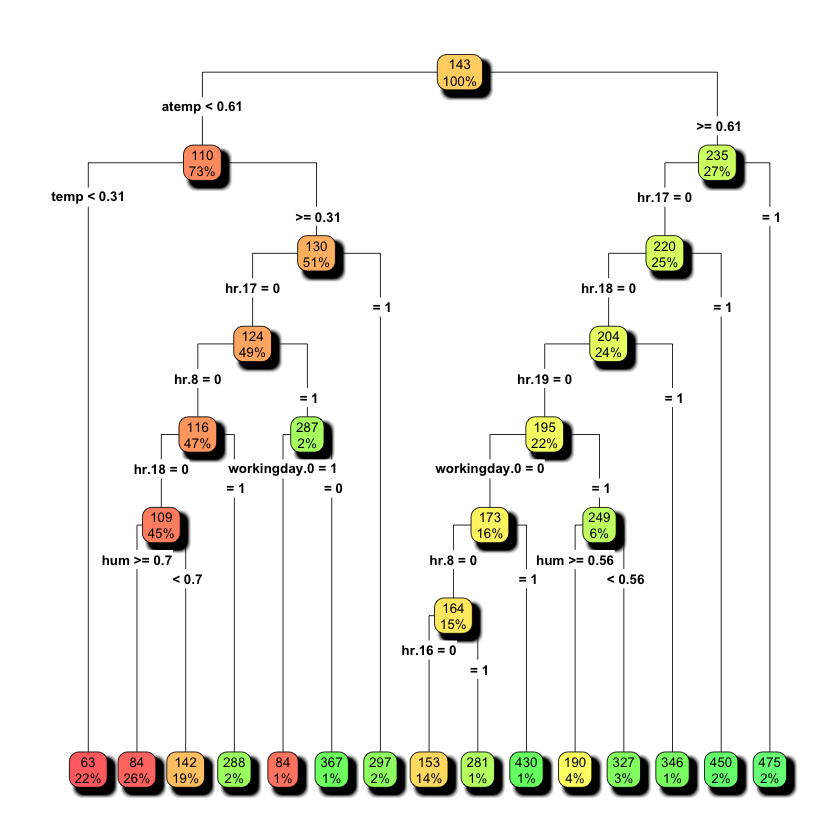

In [179]:
#Plotting regression tree to better understand for the questions

rpart.plot(pruned_bike_data, box.palette = "RdYlGn", type = 4 , shadow.col = "black")

For the bike repairs and tuneups, the best timings are definetely during low temparatures since during normal temparature it's not ideal to go for repairs

During low temparatures there are specific timing which are better for repairs and tunings like Morning hours and during high humidities

## Q - 3

#### The Wage data (ISLR2) contains information related to demographics and earnings of males in the Mid-Atlantic area.  Discretize “Wage” into three categories (low, med, high). You are asked to construct a classification tree to predict “Wage

In [180]:
wage_data <- Wage
head(wage_data)
dim(wage_data)

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.04315
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.47602
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.98218
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.68529
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.04315
376662,2008,54,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.11574


[1] 3000   11

In [181]:
summary(wage_data)

      year           age                     maritl           race     
 Min.   :2003   Min.   :18.00   1. Never Married: 648   1. White:2480  
 1st Qu.:2004   1st Qu.:33.75   2. Married      :2074   2. Black: 293  
 Median :2006   Median :42.00   3. Widowed      :  19   3. Asian: 190  
 Mean   :2006   Mean   :42.41   4. Divorced     : 204   4. Other:  37  
 3rd Qu.:2008   3rd Qu.:51.00   5. Separated    :  55                  
 Max.   :2009   Max.   :80.00                                          
                                                                       
              education                     region               jobclass   
 1. < HS Grad      :268   2. Middle Atlantic   :3000   1. Industrial :1544  
 2. HS Grad        :971   1. New England       :   0   2. Information:1456  
 3. Some College   :650   3. East North Central:   0                        
 4. College Grad   :685   4. West North Central:   0                        
 5. Advanced Degree:426   5. South Atla

In [182]:
colnames(wage_data)

[1] "year"       "age"        "maritl"     "race"       "education" 
 [6] "region"     "jobclass"   "health"     "health_ins" "logwage"   
[11] "wage"

In [183]:
str(wage_data)

'data.frame':	3000 obs. of  11 variables:
 $ year      : int  2006 2004 2003 2003 2005 2008 2009 2008 2006 2004 ...
 $ age       : int  18 24 45 43 50 54 44 30 41 52 ...
 $ maritl    : Factor w/ 5 levels "1. Never Married",..: 1 1 2 2 4 2 2 1 1 2 ...
 $ race      : Factor w/ 4 levels "1. White","2. Black",..: 1 1 1 3 1 1 4 3 2 1 ...
 $ education : Factor w/ 5 levels "1. < HS Grad",..: 1 4 3 4 2 4 3 3 3 2 ...
 $ region    : Factor w/ 9 levels "1. New England",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ jobclass  : Factor w/ 2 levels "1. Industrial",..: 1 2 1 2 2 2 1 2 2 2 ...
 $ health    : Factor w/ 2 levels "1. <=Good","2. >=Very Good": 1 2 1 2 1 2 2 1 2 2 ...
 $ health_ins: Factor w/ 2 levels "1. Yes","2. No": 2 2 1 1 1 1 1 1 1 1 ...
 $ logwage   : num  4.32 4.26 4.88 5.04 4.32 ...
 $ wage      : num  75 70.5 131 154.7 75 ...


In [184]:
#wage and legwage correlation

cor(wage_data[, c(10, 11)])

,logwage,wage
logwage,1.0000000,0.9506834
wage,0.9506834,1.0000000


In [185]:
#Due to it's high correlation we are going to drop logwage

new_wage_data <- wage_data[, -10]
head(new_wage_data)

,year,age,maritl,race,education,region,jobclass,health,health_ins,wage
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,75.04315
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,70.47602
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,130.98218
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,154.68529
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,75.04315
376662,2008,54,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,127.11574


In [186]:
# Calculating quantitles for converting wage

quant <- quantile(new_wage_data$wage, probs = c(0, 0.25, 0.75, 1))

head(quant)

0%       25%       75%      100% 
 20.08554  85.38394 128.68049 318.34243

In [206]:
new_wage_data_2 <- new_wage_data[,-1]
new_wage_data_2$wage <- cut(new_wage_data_2$wage,
                breaks = quant, labels = c("Low", "Med", "High"))

In [207]:
dim(new_wage_data_2)
head(new_wage_data_2)

[1] 3000    9

,age,maritl,race,education,region,jobclass,health,health_ins,wage
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
231655,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,Low
86582,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,Low
161300,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,High
155159,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,High
11443,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,Low
376662,54,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,Med


## Q3 - a

#### Divide the data into test and training and perform model selection to determine the optimal tree size. Comment on the performance of the tree.  How many test samples are assigned to each terminal region

In [189]:
set.seed(37)

In [208]:
wage_data_samp <- sample(nrow(new_wage_data_2),
                0.8 * nrow(new_wage_data_2), replace = FALSE)

In [209]:
training_data <- new_wage_data_2[wage_data_samp, ]
dim(training_data)

testing_data <- new_wage_data_2[-wage_data_samp, ]
dim(testing_data)

[1] 2400    9

[1] 600   9

In [192]:
#Model control

model_control <- rpart.control(minbucket = 25, cp = 0, xval = 10)

In [193]:
# fitting tree

fit_wage_data <- rpart(wage ~., data = training_data,
                       method = 'class', control = model_control)

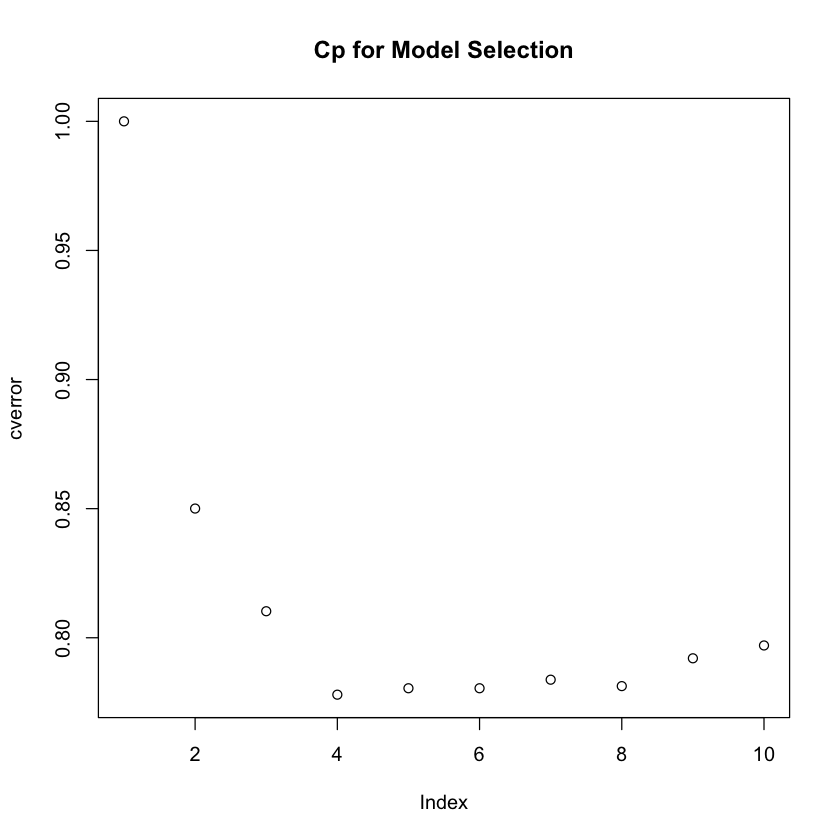

In [194]:
plot(fit_wage_data$cptable[,4],
     main = 'Cp for Model Selection', ylab = 'cverror', xlab = "Index")

In [195]:
#Minimum cp value
min_cp_val <- which.min(fit_wage_data$cptable[,4])

min_cp_val

4 
4

In [196]:
#pruning tree

pruned_wage_data <- prune(fit_wage_data, cp = fit_wage_data$cptable[min_cp_val, 1])

In [197]:
# Train and test predictions

predic_training <- predict(pruned_wage_data, newdata = training_data)
predic_testing <- predict(pruned_wage_data, newdata = testing_data)

In [198]:
head(predic_training)

,Low,Med,High
7845,0.20619658,0.6356838,0.15811966
10899,0.56923077,0.4030769,0.02769231
449651,0.05457746,0.3521127,0.59330986
451294,0.84375000,0.1484375,0.00781250
376529,0.05457746,0.3521127,0.59330986
83337,0.20619658,0.6356838,0.15811966


In [199]:
head(predic_testing)

,Low,Med,High
231655,0.84375000,0.1484375,0.00781250
86582,0.16847826,0.6086957,0.22282609
377954,0.20619658,0.6356838,0.15811966
448410,0.05457746,0.3521127,0.59330986
86064,0.20619658,0.6356838,0.15811966
378472,0.56923077,0.4030769,0.02769231


In [200]:
frame_pruned_wage_data <- pruned_wage_data$frame
head(frame_pruned_wage_data)

,var,n,wt,dev,yval,complexity,ncompete,nsurrogate,yval2
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,"<dbl[,8]>"
1,education,2399,2399,1207,2,0.056890362,4,2,"2, 610, 1192, 597, 0.2542726, 0.4968737, 0.24885369, 1.00000000"
2,age,1504,1504,690,2,0.056890362,4,0,"2, 517, 814, 173, 0.3437500, 0.5412234, 0.11502660, 0.62692789"
4,<leaf>,128,128,20,1,0.000000000,0,0,"1, 108, 19, 1, 0.8437500, 0.1484375, 0.00781250, 0.05335556"
5,health_ins,1376,1376,581,2,0.022369511,4,1,"2, 409, 795, 172, 0.2972384, 0.5777616, 0.12500000, 0.57357232"
10,education,440,440,224,1,0.022369511,4,0,"1, 216, 200, 24, 0.4909091, 0.4545455, 0.05454545, 0.18340975"
20,<leaf>,325,325,140,1,0.003590168,0,0,"1, 185, 131, 9, 0.5692308, 0.4030769, 0.02769231, 0.13547311"


In [201]:
#filtering nodes data
nodes_terminal <- frame_pruned_wage_data %>%filter(var != '<leaf>')

In [202]:
nodes_terminal[, c(1,2)]

var,n
<chr>,<int>
education,2399
age,1504
health_ins,1376
education,440
age,895
health_ins,711


We can see the number of samples in each node before splitting at that particular terminal node.

## Q3 - b

#### Model interpretation – you are asked to characterize the high wage earners.  What can you say about this group (based on the tree)?

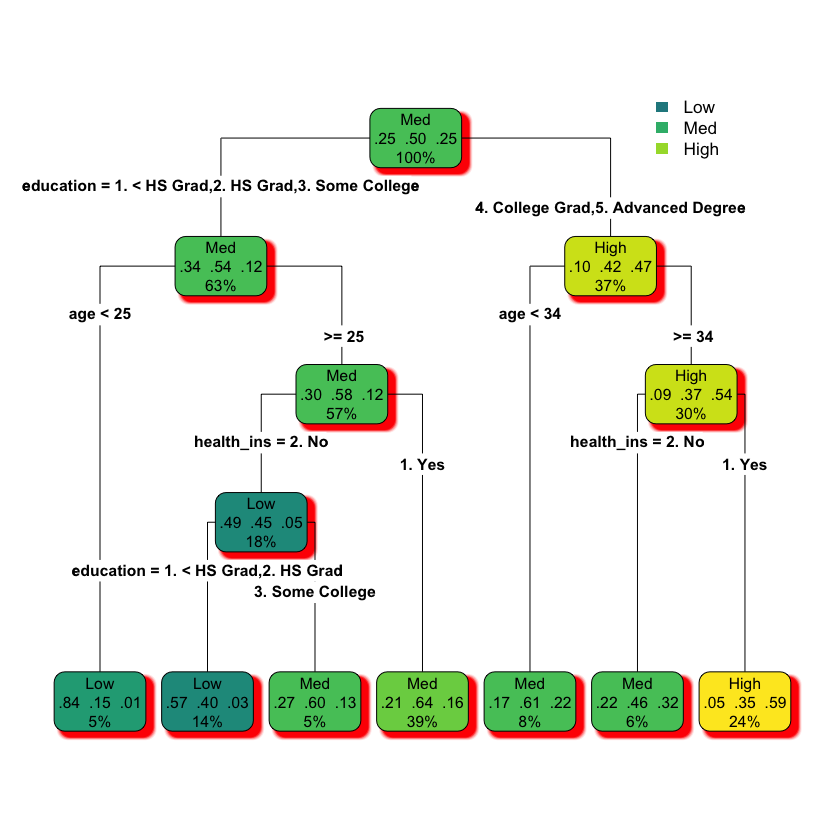

In [203]:
#pruned classification tree

rpart.plot(pruned_wage_data, box.palette = "BlGnYl", type = 4, shadow.col = "red")

According to the above plot, we can classify high wage earners as having an Advanced degree, age being less than 34 years old, and having health insurance.